### 2.1. Алгоритми упорядкованого дизерингу

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def load_image_grayscale(path):
    image = Image.open(path).convert("L")
    pixels = np.array(image, dtype=float)
    return pixels

def find_nearest_color(value):
    return 0 if value < 128 else 255

def apply_error_diffusion(pixels, diffusion_matrix):
    height, width = pixels.shape
    for y in range(height):
        for x in range(width):
            old_pixel = pixels[y, x]
            new_pixel = find_nearest_color(old_pixel)
            error = old_pixel - new_pixel
            pixels[y, x] = new_pixel

            for dx, dy, weight in diffusion_matrix:
                nx, ny = x + dx, y + dy
                if 0 <= nx < width and 0 <= ny < height:
                    pixels[ny, nx] += error * weight
    return pixels

def show_image(pixels, title):
    plt.figure(figsize=(10, 5))
    plt.imshow(pixels, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title(title)
    plt.show()


2.1.1. Алгоритм розсіювання помилок Флойда-Стейнберга

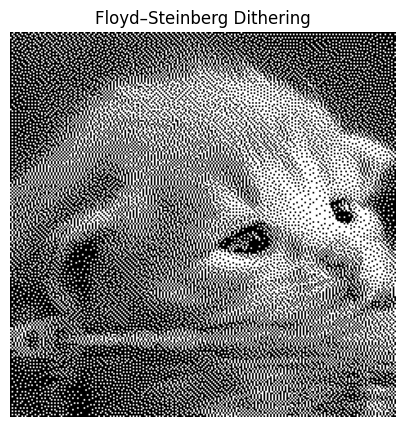

In [14]:
pixels = load_image_grayscale("cat.jpg")

floyd_steinberg_matrix = [
    (1, 0, 7 / 16),
    (-1, 1, 3 / 16),
    (0, 1, 5 / 16),
    (1, 1, 1 / 16)
]

result = apply_error_diffusion(pixels, floyd_steinberg_matrix)
show_image(result, "Floyd–Steinberg Dithering")


2.1.2. Алгоритм Джарвіса–Джудіса–Нінке

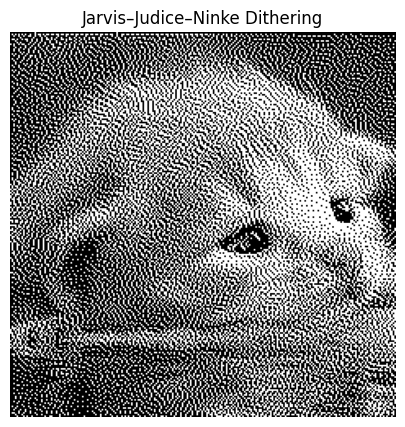

In [15]:
pixels = load_image_grayscale("cat.jpg")

jarvis_matrix = [
    (1, 0, 7 / 48), (2, 0, 5 / 48),
    (-2, 1, 3 / 48), (-1, 1, 5 / 48), (0, 1, 7 / 48), (1, 1, 5 / 48), (2, 1, 3 / 48),
    (-2, 2, 1 / 48), (-1, 2, 3 / 48), (0, 2, 5 / 48), (1, 2, 3 / 48), (2, 2, 1 / 48)
]

result = apply_error_diffusion(pixels, jarvis_matrix)
show_image(result, "Jarvis–Judice–Ninke Dithering")


2.1.3. Алгоритм Пітера Штуки

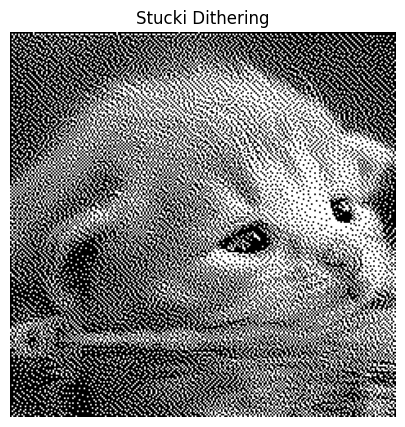

In [16]:
pixels = load_image_grayscale("cat.jpg")

stucki_matrix = [
    (1, 0, 8 / 42), (2, 0, 4 / 42),
    (-2, 1, 2 / 42), (-1, 1, 4 / 42), (0, 1, 8 / 42), (1, 1, 4 / 42), (2, 1, 2 / 42),
    (-2, 2, 1 / 42), (-1, 2, 2 / 42), (0, 2, 4 / 42), (1, 2, 2 / 42), (2, 2, 1 / 42)
]

result = apply_error_diffusion(pixels, stucki_matrix)
show_image(result, "Stucki Dithering")


2.1.4. Алгоритм Аткінсона

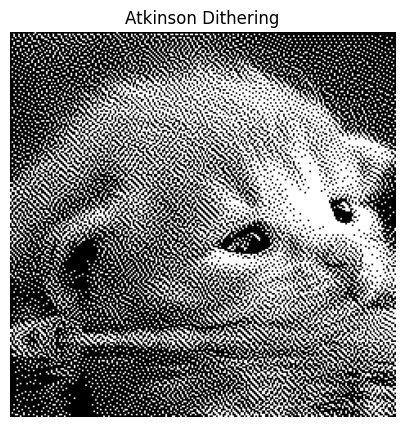

In [17]:
pixels = load_image_grayscale("cat.jpg")

atkinson_matrix = [
    (1, 0, 1 / 8), (2, 0, 1 / 8),
    (-1, 1, 1 / 8), (0, 1, 1 / 8), (1, 1, 1 / 8),
    (0, 2, 1 / 8)
]

result = apply_error_diffusion(pixels, atkinson_matrix)
show_image(result, "Atkinson Dithering")


2.1.5. Алгоритм Беркеса

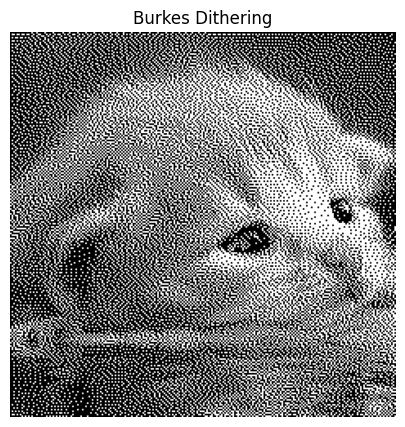

In [18]:
pixels = load_image_grayscale("cat.jpg")

burkes_matrix = [
    (1, 0, 8 / 32), (2, 0, 4 / 32),
    (-2, 1, 2 / 32), (-1, 1, 4 / 32), (0, 1, 8 / 32), (1, 1, 4 / 32), (2, 1, 2 / 32)
]

result = apply_error_diffusion(pixels, burkes_matrix)
show_image(result, "Burkes Dithering")


2.1.6. Алгоритм Сієрри

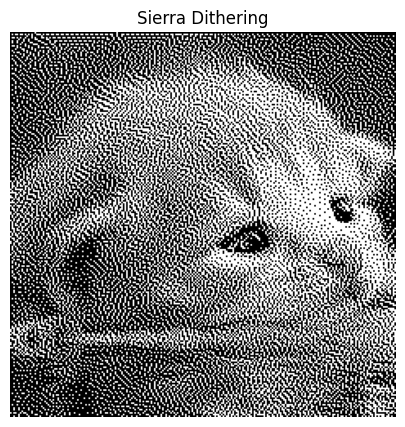

In [19]:
pixels = load_image_grayscale("cat.jpg")

sierra_matrix = [
    (1, 0, 5 / 32), (2, 0, 3 / 32),
    (-2, 1, 2 / 32), (-1, 1, 4 / 32), (0, 1, 5 / 32), (1, 1, 4 / 32), (2, 1, 2 / 32),
    (-1, 2, 2 / 32), (0, 2, 3 / 32), (1, 2, 2 / 32)
]

result = apply_error_diffusion(pixels, sierra_matrix)
show_image(result, "Sierra Dithering")


2.1.7. Алгоритм Байєра

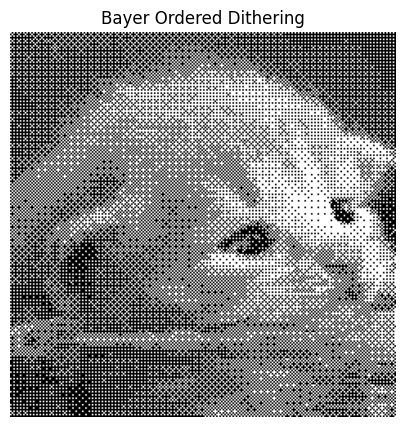

In [20]:
pixels = load_image_grayscale("cat.jpg")

bayer_matrix = np.array([
    [ 1,  9,  3, 11],
    [13,  5, 15,  7],
    [ 4, 12,  2, 10],
    [16,  8, 14,  6]
], dtype=float)

bayer_matrix = (bayer_matrix - 1) / 16 * 255

height, width = pixels.shape
matrix_size = bayer_matrix.shape[0]

for y in range(height):
    for x in range(width):
        threshold = bayer_matrix[y % matrix_size, x % matrix_size]
        pixels[y, x] = 255 if pixels[y, x] > threshold else 0

show_image(pixels, "Bayer Ordered Dithering")
